EDA

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
df = pd.read_csv("mpg_raw.csv")


In [84]:
df


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [85]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [86]:
df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
23,26.0,4,121.0,113.0,2234,12.5,70,europe,bmw 2002
154,15.0,6,250.0,72.0,3432,21.0,75,usa,mercury monarch
254,20.2,6,200.0,85.0,2965,15.8,78,usa,ford fairmont (auto)
61,21.0,4,122.0,86.0,2226,16.5,72,usa,ford pinto runabout
99,18.0,6,232.0,100.0,2945,16.0,73,usa,amc hornet


In [87]:
df.shape

(398, 9)

In [88]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [89]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin              str
name                str
dtype: object

In [90]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    str    
 8   name          398 non-null    str    
dtypes: float64(4), int64(3), str(2)
memory usage: 28.1 KB


In [91]:
df.isna().sum()
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [92]:
df.dropna(inplace = True)
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

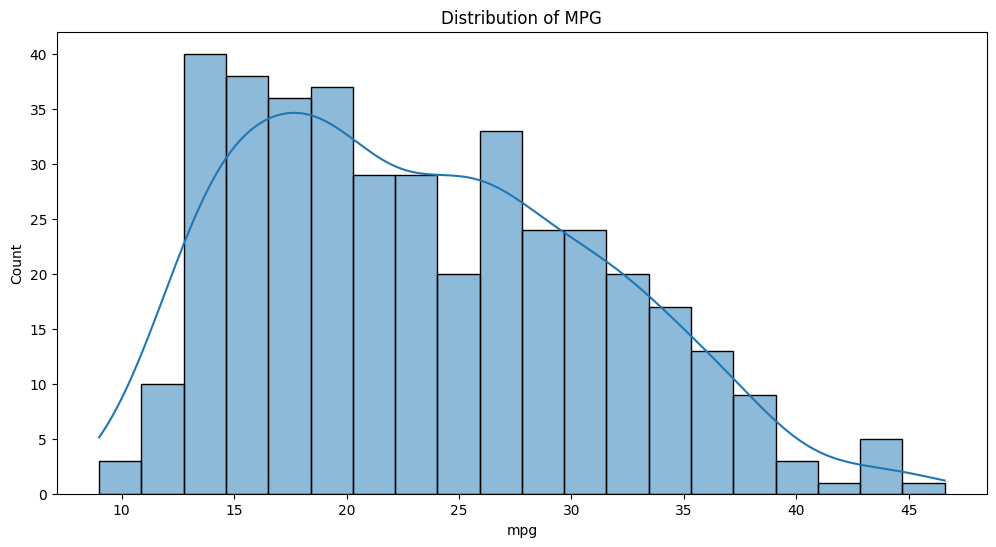

In [93]:
plt.figure(figsize=(12,6))
sns.histplot(df["mpg"], kde = True, bins = 20)
plt.title('Distribution of MPG')
plt.show()

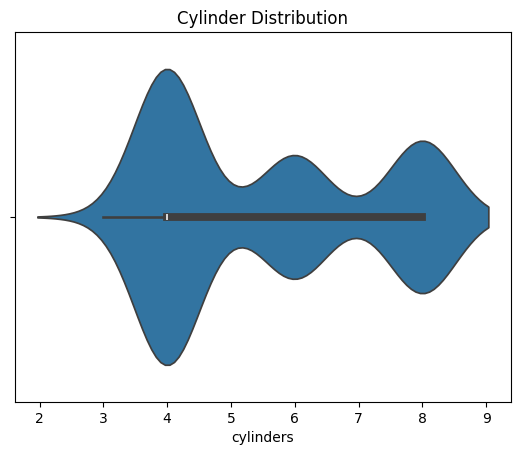

In [94]:
sns.violinplot(x = df['cylinders'])
plt.title("Cylinder Distribution")
plt.show()

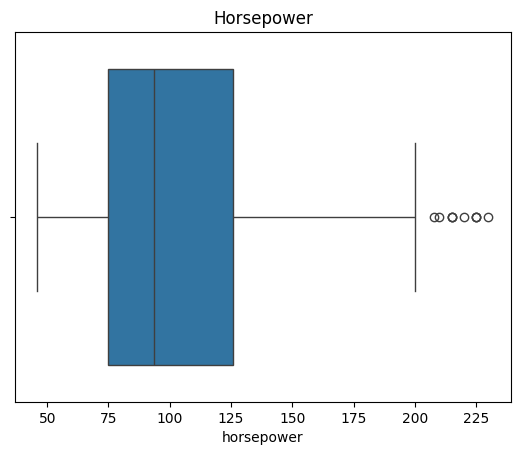

In [95]:
sns.boxplot(x=df['horsepower'])
plt.title('Horsepower')
plt.show()

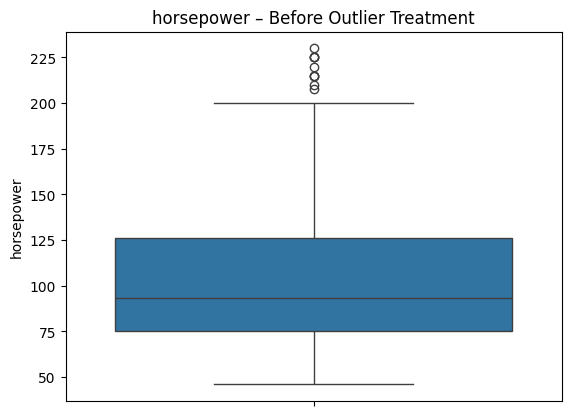

In [96]:
sns.boxplot(y=df['horsepower'])
plt.title("horsepower – Before Outlier Treatment")
plt.show()


In [97]:
Q1 = df['horsepower'].quantile(0.25)
Q3 = df['horsepower'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['horsepower'] >= lower_bound) & (df['horsepower'] <= upper_bound)]


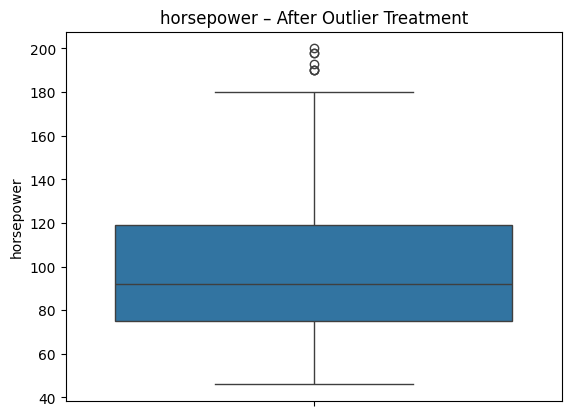

In [98]:
sns.boxplot(y=df_no_outliers['horsepower'])
plt.title("horsepower – After Outlier Treatment")
plt.show()


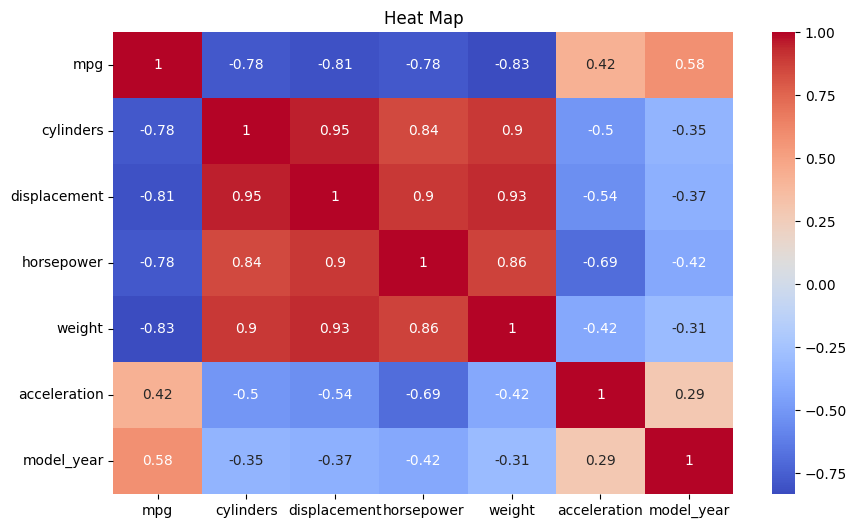

In [99]:
plt.figure (figsize=(10,6))
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap = "coolwarm")
plt.title("Heat Map");
plt.show();

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_fit = df[["horsepower", "mpg", "acceleration"]]
df_scaled=scaler.fit_transform(df_fit)
df_scaled = pd.DataFrame(df_scaled, columns=df_fit.columns)
df_scaled.head()

,horsepower,mpg,acceleration
0,0.664133,-0.698638,-1.285258
1,1.574594,-1.083498,-1.466724
2,1.184397,-0.698638,-1.648189
3,1.184397,-0.955212,-1.285258
4,0.924265,-0.826925,-1.829655
